In [1]:
import sys

%matplotlib inline
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from glob import glob
import numpy as np

from plot_mel import * 

from tqdm import tqdm

# Import encoded spaces

In [2]:
encoded_space_SPA = torch.load("/Users/diego/Documents/Università/LCPb/Suweis_project/PheezeekzSuperteam/Dataset_Diego/encoded_space_SPA.pt")

In [3]:
encoded_space_SPA.shape

torch.Size([3000, 3000])

## PCA and t-SNE

In [22]:
#You need to remember how much spanish vs non-spanish is there in your encoded space...
labels = [1 for _ in range(1000)] + [0 for _ in range(2000)]

In [5]:
pca = PCA(n_components=50)
pca.fit(encoded_space_SPA)
print(pca.explained_variance_)

[166.01711048 122.31615459  69.01874954  46.63972217  39.42130398
  31.30381686  29.75348734  29.04177984  27.25592511  24.66076642
  24.0644871   22.57912954  21.89798979  20.89678184  19.49213292
  18.81288517  18.28323538  16.14670232  15.06907722  14.25640791
  13.38873069  12.66257018  12.04649228  10.94472804  10.78476158
  10.44909885   9.44273119   8.425718     8.2832956    7.21263237
   6.87944132   6.82421267   6.0469214    5.52667504   4.92292803
   4.44228716   4.25857178   3.67336228   3.61731892   3.08928644
   2.83424704   2.49342508   2.39592989   2.31214468   2.14278342
   1.99738      1.94739431   1.76368186   1.56688022   1.4683736 ]


In [6]:
transformed_data = pca.transform(encoded_space_SPA)

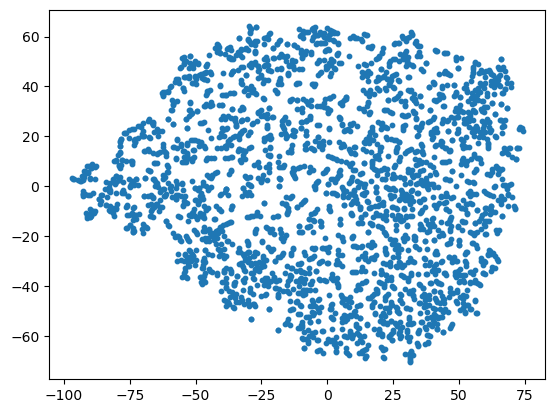

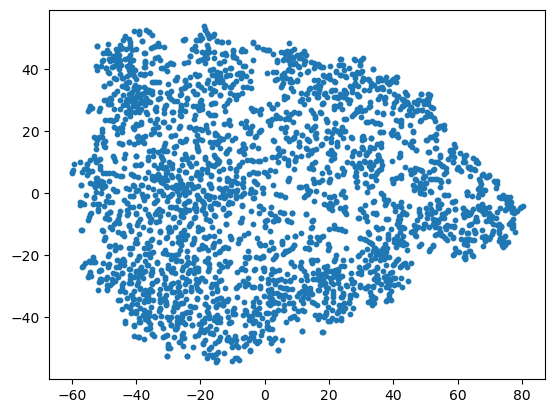

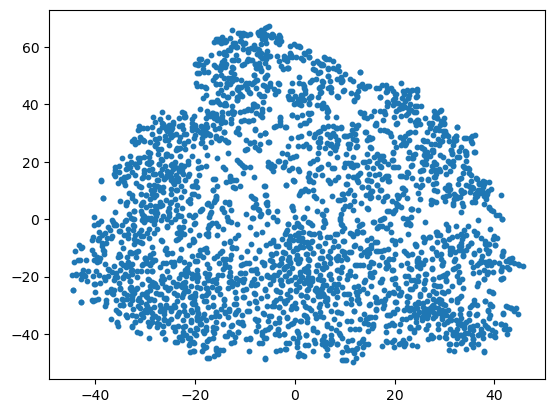

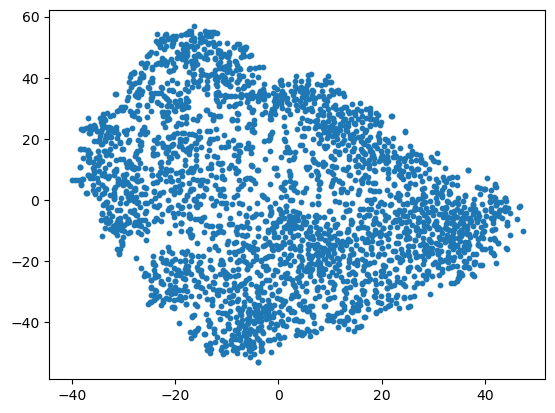

In [17]:
for perp in range(10,50,10):

    X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=perp).fit_transform(transformed_data)
    plt.scatter(X_embedded[:,0],X_embedded[:,1],s=10,c=labels)
    plt.title(f"PCA + t-SNE with perplexity {perp}")
    plt.show()

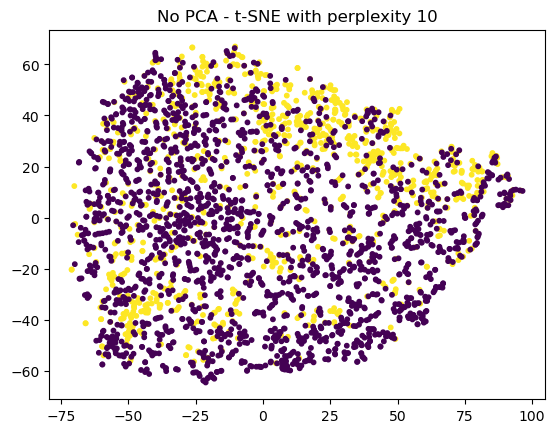

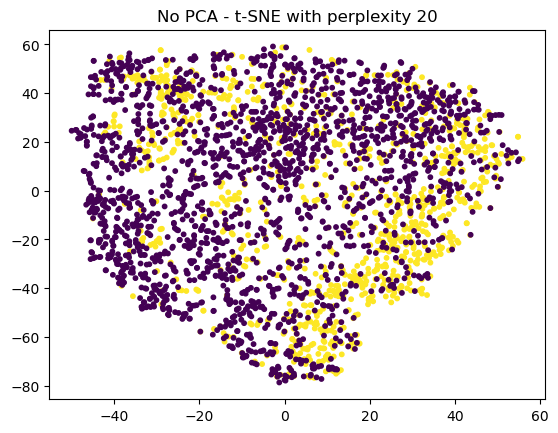

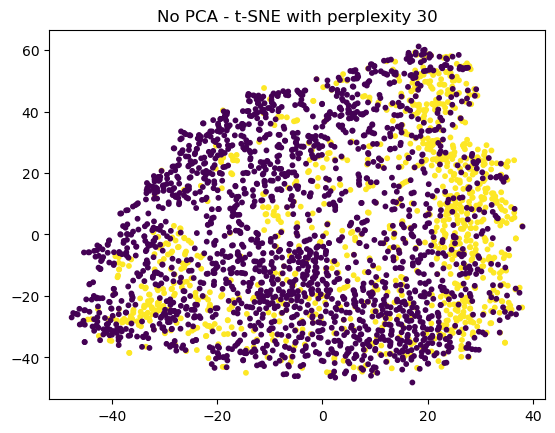

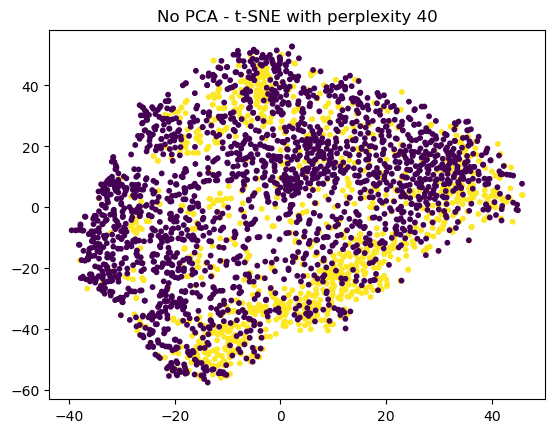

In [23]:
#non pca-ed data

for perp in range(10,50,10):

    X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=perp).fit_transform(encoded_space_SPA)
    plt.scatter(X_embedded[:,0],X_embedded[:,1],s=10,c=labels)
    plt.title(f"No PCA - t-SNE with perplexity {perp}")
    plt.show()